# 注意力机制汇总

注意力机制（Attention Mechanism）是深度学习中一种重要的技术，最初用于自然语言处理（NLP）任务，如机器翻译。它的核心思想是让模型在处理输入数据时，能够动态地关注输入的不同部分，而不是平等地对待所有部分。

## 1. 基本概念
注意力机制的核心是计算一个**注意力权重**，用于衡量输入序列中每个元素对当前输出的重要性。假设我们有一个输入序列 $X = [x_1, x_2, \dots, x_n]$，其中 $x_i$ 是序列中的第 $i$ 个元素。注意力机制的目标是为每个 $x_i$ 计算一个权重 $\alpha_i$，表示它对当前输出的贡献。

## 2. 注意力权重的计算
注意力权重通常通过以下步骤计算：

1. **计算相似度**：首先，计算当前输出状态（或查询向量 $q$）与每个输入元素 $x_i$ 的相似度。相似度可以通过点积、加性模型或其他方式计算。例如，使用点积计算相似度：
   $$
   e_i = q^T x_i
   $$

2. **归一化**：将相似度 $e_i$ 通过 softmax 函数归一化为注意力权重 $\alpha_i$：
   $$
   \alpha_i = \frac{\exp(e_i)}{\sum_{j=1}^n \exp(e_j)}
   $$

3. **加权求和**：使用注意力权重对输入序列进行加权求和，得到上下文向量 $c$：
   $$
   c = \sum_{i=1}^n \alpha_i x_i
   $$

## 3. 自注意力机制
自注意力机制（Self-Attention）是注意力机制的一种变体，广泛应用于 Transformer 模型中。在自注意力机制中，输入序列中的每个元素都会与序列中的其他元素计算注意力权重。具体步骤如下：

1. **计算查询、键和值**：对于每个输入元素 $x_i$，计算查询向量 $q_i$、键向量 $k_i$ 和值向量 $v_i$：
   $$
   q_i = W_q x_i, \quad k_i = W_k x_i, \quad v_i = W_v x_i
   $$
   其中 $W_q$、$W_k$ 和 $W_v$ 是可学习的权重矩阵。

2. **计算注意力权重**：计算每个查询向量 $q_i$ 与所有键向量 $k_j$ 的相似度，并通过 softmax 归一化：
   $$
   e_{ij} = q_i^T k_j, \quad \alpha_{ij} = \frac{\exp(e_{ij})}{\sum_{k=1}^n \exp(e_{ik})}
   $$

3. **加权求和**：使用注意力权重对值向量 $v_j$ 进行加权求和，得到输出向量 $o_i$：
   $$
   o_i = \sum_{j=1}^n \alpha_{ij} v_j
   $$

## 4. 多头注意力
多头注意力（Multi-Head Attention）是自注意力机制的扩展，通过并行计算多个注意力头来捕捉不同的特征表示。每个注意力头都有自己的查询、键和值矩阵，最终的输出是多个注意力头的拼接或加权求和。

## 5. 应用
注意力机制广泛应用于各种深度学习任务中，如机器翻译、文本生成、图像描述生成等。它在 Transformer 模型中的成功应用，使得注意力机制成为现代深度学习中的核心技术之一。

通过注意力机制，模型能够更好地捕捉输入数据中的长距离依赖关系，从而提高模型的性能。

# 注意力机制的可视化

In [6]:
import torch
from d2l import torch as d2l

为了可视化注意力权重，需要定义一个show_heatmaps函数。其输入matrices的形状是（要显示的行数，要显示的列数，查询的数目，键的数目）。

In [7]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """
    显示矩阵热图

    参数:
    matrices: 输入的矩阵或矩阵列表（可以是二维或三维的张量）。
    xlabel: x 轴的标签。
    ylabel: y 轴的标签。
    titles: 每个子图的标题（可选）。
    figsize: 图像的大小（默认 (2.5, 2.5)）。
    cmap: 颜色映射（默认 'Reds'）。
    """
    # 设置图像显示格式为 SVG
    d2l.use_svg_display()
    
    # 获取矩阵的行数和列数
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    
    # 创建子图网格
    fig, axes = d2l.plt.subplots(
        num_rows, num_cols, figsize=figsize, 
        sharex=True, sharey=True, squeeze=False
    )
    
    # 遍历每个矩阵并绘制热图
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            # 将矩阵转换为 NumPy 数组并绘制热图
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            
            # 设置 x 轴标签（仅在最下面一行显示）
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            
            # 设置 y 轴标签（仅在左侧第一列显示）
            if j == 0:
                ax.set_ylabel(ylabel)
            
            # 设置子图标题（如果提供了 titles）
            if titles:
                ax.set_title(titles[j])
    
    # 添加颜色条
    fig.colorbar(pcm, ax=axes, shrink=0.6)

现在通过一个例子来说明

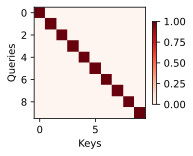

In [8]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

# 注意力汇聚：Nadaraya-Watson 核回归

In [9]:
import torch
from torch import nn
from d2l import torch as d2l

## 生成数据集

In [10]:
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)  # 排序后的训练样本

这段代码生成了一个包含 50 个随机数的张量，这些随机数的范围在 [0,5) 之间，并且已经按照从小到大的顺序排序。x_train 是排序后的张量，可以作为训练数据的输入特征。

In [11]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

In [12]:
y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,)) # 训练样本的输出
x_test = torch.arange(0, 5, 0.1) # 测试样本
y_truth = f(x_test) # 测试样本的真实输出
n_test = len(x_test) # 测试样本数
n_test

50

In [13]:
def plot_kernel_reg(y_hat):
    """
    绘制核回归的预测结果，并与真实值进行对比。
    
    参数:
    y_hat: 模型的预测值
    """
    # 绘制测试数据的真实值和预测值
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    
    # 绘制训练数据点
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

## 平均汇聚

先使用最简单的估计器来解决回归问题。基于平均汇聚来计算所有训练样本输出值的平均值

这个估计器的效果比较差。真实函数f（“Truth”）和预测函数（“Pred”）相差很大。

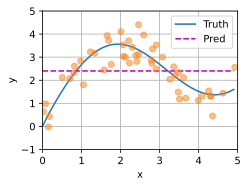

In [14]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

## 非参数注意力汇聚


### 1. **核心思想**
非参数注意力汇聚的目标是通过计算输入数据之间的相似度，动态地为每个输入分配权重，然后对这些输入进行加权平均。具体步骤如下：

1. **计算相似度**：
   - 给定一个查询（query）$q$ 和一组键（keys）$k_i$，计算查询与每个键的相似度 $s(q, k_i)$。
   - 相似度可以通过点积、欧氏距离、高斯核函数等方式计算。

2. **计算注意力权重**：
   - 将相似度通过 softmax 函数归一化为注意力权重 $\alpha_i$：
     $$
     \alpha_i = \frac{\exp(s(q, k_i))}{\sum_{j=1}^n \exp(s(q, k_j))}
     $$

3. **加权平均**：
   - 使用注意力权重对对应的值（values）$v_i$ 进行加权平均，得到输出：
     $$
     \text{Output} = \sum_{i=1}^n \alpha_i v_i
     $$

---

### 2. **特点**
- **无参数**：非参数注意力汇聚不引入任何可学习的参数，完全依赖于输入数据本身。
- **灵活性**：可以根据具体任务选择不同的相似度计算方式（如点积、高斯核等）。
- **局部性**：如果使用高斯核等局部性强的相似度函数，非参数注意力汇聚会倾向于关注与查询相似的局部区域。
- **计算效率**：由于没有可学习参数，计算过程相对简单，但在大规模数据集上可能计算量较大。

---

### 3. **应用场景**
- **时间序列预测**：对历史数据进行加权平均，预测未来值。
- **图像处理**：对图像中的局部区域进行加权平均，实现平滑或去噪。
- **数据插值**：对缺失数据进行加权插值。

---

### 4. **优缺点**
- **优点**：
  - 简单直观，易于实现。
  - 不需要训练，适用于小规模数据或缺乏标注数据的场景。
  - 对输入数据的分布没有假设，具有较好的通用性。

- **缺点**：
  - 计算复杂度较高，尤其是在大规模数据集上。
  - 缺乏可学习参数，可能无法捕捉复杂的非线性关系。
  - 对相似度函数的选择敏感，需要根据任务进行调整。

---
### 5. **与参数化注意力机制的区别**
- **参数化注意力机制**（如 Transformer 中的自注意力）引入了可学习的参数（如查询、键、值的线性变换矩阵），能够通过训练优化注意力权重。
- **非参数注意力汇聚**不引入任何可学习参数，完全依赖于输入数据的相似度计算。



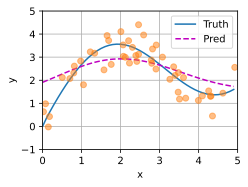

In [15]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

现在来观察注意力的权重。这里测试数据的输入相当于查询，而训练数据的输入相当于键。因为两个输入都是经过排序的，因此由观察可知“查询‐键”对越接近，注意力汇聚的注意力权重就越高。

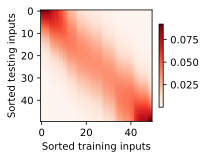

In [16]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                    xlabel='Sorted training inputs',
                    ylabel='Sorted testing inputs')

## 带参数注意力汇聚

带参数的注意力汇聚（Parametric Attention Pooling）是一种通过学习参数来动态调整注意力权重的方法。与传统的注意力机制不同，带参数的注意力汇聚引入了可学习的参数，使得模型能够根据输入数据自适应地调整注意力分布。

### 1. 注意力机制的基本思想
注意力机制的核心思想是通过计算输入序列中每个元素的权重，来加权求和得到输出。给定输入序列 $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n]$，其中 $\mathbf{x}_i \in \mathbb{R}^d$，注意力机制的目标是计算每个元素的权重 $\alpha_i$，然后通过加权求和得到输出 $\mathbf{o}$：

$$
\mathbf{o} = \sum_{i=1}^n \alpha_i \mathbf{x}_i
$$

其中，$\alpha_i$ 是通过某种函数计算得到的权重，通常满足 $\sum_{i=1}^n \alpha_i = 1$。

### 2. 带参数的注意力汇聚
在带参数的注意力汇聚中，权重 $\alpha_i$ 是通过一个可学习的参数化函数计算得到的。具体来说，给定一个查询向量 $\mathbf{q} \in \mathbb{R}^d$ 和键向量 $\mathbf{k}_i \in \mathbb{R}^d$（通常 $\mathbf{k}_i$ 是 $\mathbf{x}_i$ 的某种变换），权重 $\alpha_i$ 可以表示为：

$$
\alpha_i = \frac{\exp(f(\mathbf{q}, \mathbf{k}_i))}{\sum_{j=1}^n \exp(f(\mathbf{q}, \mathbf{k}_j))}
$$

其中，$f(\mathbf{q}, \mathbf{k}_i)$ 是一个可学习的函数，通常是一个简单的点积或一个多层感知机（MLP）。例如，如果使用点积作为 $f$，则：

$$
f(\mathbf{q}, \mathbf{k}_i) = \mathbf{q}^\top \mathbf{k}_i
$$

如果使用 MLP，则：

$$
f(\mathbf{q}, \mathbf{k}_i) = \mathbf{W}_2^\top \tanh(\mathbf{W}_1 [\mathbf{q}; \mathbf{k}_i] + \mathbf{b}_1) + b_2
$$

其中，$\mathbf{W}_1$、$\mathbf{W}_2$、$\mathbf{b}_1$ 和 $b_2$ 是可学习的参数。

### 3. 带参数的注意力汇聚的优势
带参数的注意力汇聚的主要优势在于其灵活性。通过引入可学习的参数，模型能够根据任务需求自适应地调整注意力权重，从而更好地捕捉输入数据中的重要信息。此外，带参数的注意力汇聚可以与其他神经网络结构（如卷积神经网络、循环神经网络等）结合使用，进一步提升模型的性能。

### 批量矩阵乘法

In [17]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape

torch.Size([2, 1, 6])

在注意力机制的背景中，我们可以使用小批量矩阵乘法来计算小批量数据中的加权平均值。

In [18]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

tensor([[[ 4.5000]],

        [[14.5000]]])

### 定义模型

In [19]:
import torch
import torch.nn as nn

class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        """
        初始化核回归模块。
        """
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))  # 可学习的参数，控制核函数的宽度

    def forward(self, queries, keys, values):
        """
        前向传播逻辑。
        
        参数:
        - queries: 查询向量，形状为 (查询个数, “键－值”对个数)
        - keys: 键向量，形状为 (查询个数, “键－值”对个数)
        - values: 值向量，形状为 (查询个数, “键－值”对个数)
        
        返回:
        - 加权和，形状为 (查询个数,)
        """
        # 将 queries 每个元素重复 keys.shape[1] 次，调整形状为 (查询个数 * “键－值”对个数, “键－值”对个数)
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        
        # 计算注意力权重
        # 核函数公式：exp(-((queries - keys) * w)^2 / 2)
        # 使用 softmax 归一化权重
        self.attention_weights = nn.functional.softmax(
            -((queries - keys) * self.w)**2 / 2, dim=1)
        
        # 计算加权和
        # 使用批量矩阵乘法 torch.bmm
        # attention_weights: (查询个数, 1, “键－值”对个数)
        # values: (查询个数, “键－值”对个数, 1)
        # 结果: (查询个数, 1, 1) -> 展平为 (查询个数,)
        return torch.bmm(self.attention_weights.unsqueeze(1),
                         values.unsqueeze(-1)).reshape(-1)

### 训练

接下来，将训练数据集变换为键和值用于训练注意力模型。在带参数的注意力汇聚模型中，任何一个训练样本的输入都会和除自己以外的所有训练样本的“键－值”对进行计算，从而得到其对应的预测输出。

In [20]:
# X_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))
# Y_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))
# keys的形状:('n_train'，'n_train'-1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
# values的形状:('n_train'，'n_train'-1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

训练带参数的注意力汇聚模型时，使用平方损失函数和随机梯度下降。

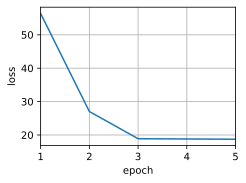

In [22]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

如下所示，训练完带参数的注意力汇聚模型后可以发现：在尝试拟合带噪声的训练数据时，预测结果绘制的线不如之前非参数模型的平滑。

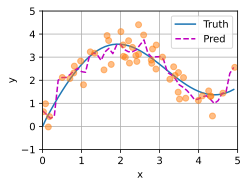

In [23]:
# keys的形状:(n_test，n_train)，每一行包含着相同的训练输入（例如，相同的键）
keys = x_train.repeat((n_test, 1))
# value的形状:(n_test，n_train)
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

我们尝试寻找模型不平滑的原因，与非参数的注意力汇聚模型相比，带参数的模型加入可学习的参数后，曲线在注意力权重较大的区域变得更不平滑。

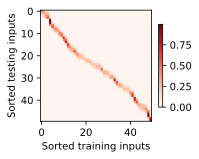

In [24]:
d2l.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
                xlabel='Sorted training inputs',
                ylabel='Sorted testing inputs')

# 注意力评分函数

## 1. **基本概念**：
   - 给定一个查询向量 $\mathbf{q}$ 和一组键向量 $\{\mathbf{k}_1, \mathbf{k}_2, \dots, \mathbf{k}_n\}$，注意力评分函数计算每个键与查询的相关性分数。
   - 这些分数通常通过一个标量函数 $f(\mathbf{q}, \mathbf{k}_i)$ 来计算。

## 2. **常见的评分函数**：
   - **点积注意力（Dot-Product Attention）**：
     - 评分函数为 $f(\mathbf{q}, \mathbf{k}_i) = \mathbf{q}^\top \mathbf{k}_i$。
     - 适用于查询和键的维度相同的情况。
   - **缩放点积注意力（Scaled Dot-Product Attention）**：
     - 评分函数为 $f(\mathbf{q}, \mathbf{k}_i) = \frac{\mathbf{q}^\top \mathbf{k}_i}{\sqrt{d_k}}$，其中 $d_k$ 是键的维度。
     - 通过缩放因子 $\sqrt{d_k}$ 来防止点积值过大，导致梯度不稳定。
   - **加性注意力（Additive Attention）**：
     - 评分函数为 $f(\mathbf{q}, \mathbf{k}_i) = \mathbf{v}^\top \tanh(\mathbf{W}_q \mathbf{q} + \mathbf{W}_k \mathbf{k}_i)$，其中 $\mathbf{W}_q$ 和 $\mathbf{W}_k$ 是可学习的权重矩阵，$\mathbf{v}$ 是权重向量。
     - 适用于查询和键的维度不同的情况。

## 3. **归一化**：
   - 评分函数计算出的分数通常通过 softmax 函数进行归一化，得到注意力权重：
     $$ \alpha_i = \frac{\exp(f(\mathbf{q}, \mathbf{k}_i))}{\sum_{j=1}^n \exp(f(\mathbf{q}, \mathbf{k}_j))} $$
   - 这些权重用于加权求和值向量 $\{\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n\}$，生成最终的输出。

## 4. **应用场景**：
   - 注意力评分函数广泛应用于自然语言处理（如 Transformer 模型）、计算机视觉和多模态任务中，用于捕捉输入数据中的重要信息。

总结来说，注意力评分函数通过计算查询和键之间的相关性分数，帮助模型决定在生成输出时应该关注哪些部分的信息。常见的评分函数包括点积注意力、缩放点积注意力和加性注意力。

In [25]:
import math
import torch
from torch import nn
from d2l import torch as d2l

## 掩蔽softmax操作

softmax操作用于输出一个概率分布作为注意力权重。在某些情况下，并非所有的值都应该被纳入到注意力汇聚中。例如某些文本序列被填充了没有意义的特殊词元。为了仅将有意义的词元作为值来获取注意力汇聚，可以指定一个有效序列长度（即词元的个数），以便在计算softmax时过滤掉超出指定范围的位置。下面的masked_softmax函数实现了这样的掩蔽softmax操作（masked softmax operation），其中任何超出有效长度的位置都被掩蔽并置为0。

In [26]:
#@save
def masked_softmax(X, valid_lens):
    """
    通过在最后一个轴上掩蔽元素来执行softmax操作。
    
    参数:
    - X: 3D张量，形状为 (batch_size, num_queries, num_keys)
    - valid_lens: 1D或2D张量，表示每个序列的有效长度
    
    返回:
    - 掩蔽后的 softmax 结果
    """
    if valid_lens is None:
        # 如果没有提供有效长度，直接对最后一个维度应用 softmax
        return nn.functional.softmax(X, dim=-1)
    else:
        # 获取输入张量的形状
        shape = X.shape
        # 如果 valid_lens 是 1D 张量，表示每个样本有一个有效长度
        if valid_lens.dim() == 1:
            # 将 valid_lens 重复扩展为与 X 的第二个维度相同长度
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            # 如果 valid_lens 是 2D 张量，表示每个样本的每个查询都有一个有效长度
            valid_lens = valid_lens.reshape(-1)
        
        # 对 X 进行掩蔽操作
        # 将 X 重塑为 2D 张量，形状为 (batch_size * num_queries, num_keys)
        X = d2l.sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=-1e6)
        
        # 将掩蔽后的张量重新调整为原始形状
        return nn.functional.softmax(X.reshape(shape), dim=-1)

考虑由两个2 × 4矩阵表示的样本，这两个样本的有效长度分别为2和3。经过掩蔽softmax操作，超出有效长度的值都被掩蔽为0。

In [27]:
masked_softmax(torch.rand(2, 2, 4), torch.tensor([2, 3]))

tensor([[[0.4743, 0.5257, 0.0000, 0.0000],
         [0.4019, 0.5981, 0.0000, 0.0000]],

        [[0.3317, 0.4499, 0.2183, 0.0000],
         [0.3536, 0.2090, 0.4374, 0.0000]]])

同样，也可以使用二维张量，为矩阵样本中的每一行指定有效长度

In [28]:
masked_softmax(torch.rand(2, 2, 4), torch.tensor([[1, 3], [2, 4]]))

tensor([[[1.0000, 0.0000, 0.0000, 0.0000],
         [0.4364, 0.2217, 0.3419, 0.0000]],

        [[0.5264, 0.4736, 0.0000, 0.0000],
         [0.3910, 0.2098, 0.1749, 0.2243]]])

## 加性注意力

In [29]:
class AdditiveAttention(nn.Module):
    """加性注意力"""
    def __init__(self, key_size, query_size, num_hiddens, dropout, **kwargs):
        super(AdditiveAttention, self).__init__(**kwargs)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)  # 键的线性变换
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)  # 查询的线性变换
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)  # 用于计算注意力分数的线性变换
        self.dropout = nn.Dropout(dropout)  # Dropout 层

    def forward(self, queries, keys, values, valid_lens):
        # 将查询和键通过线性变换映射到隐藏空间
        queries = self.W_q(queries)  # 形状变为 (batch_size, num_queries, num_hiddens)
        keys = self.W_k(keys)  # 形状变为 (batch_size, num_keys, num_hiddens)
        
        # 在维度扩展后，使用广播方式进行求和
        queries = queries.unsqueeze(2)  # 形状变为 (batch_size, num_queries, 1, num_hiddens)
        keys = keys.unsqueeze(1)  # 形状变为 (batch_size, 1, num_keys, num_hiddens)
        features = queries + keys  # 广播求和，形状变为 (batch_size, num_queries, num_keys, num_hiddens)
        
        # 使用激活函数进行非线性变换
        features = torch.tanh(features)
        
        # 计算注意力分数
        scores = self.w_v(features).squeeze(-1)  # 形状变为 (batch_size, num_queries, num_keys)
        
        # 应用掩蔽操作
        self.attention_weights = masked_softmax(scores, valid_lens)
        
        # 应用 Dropout
        attention_weights = self.dropout(self.attention_weights)
        
        # 对值进行加权求和
        output = torch.bmm(attention_weights, values)  # 形状变为 (batch_size, num_queries, value_size)
        
        return output

现在尝试用一个小例子来演示上面的AdditiveAttention类，其中查询、键和值的形状为（批量大小，步数或词元序列长度，特征大小），实际输出为(2, 1, 20)、(2, 10, 2)和(2, 10, 4)。注意力汇聚输出的形状为（批量大小，查询的步数，值的维度）。

In [30]:
queries, keys = torch.normal(0, 1, (2, 1, 20)), torch.ones((2, 10, 2))
# values的小批量，两个值矩阵是相同的
values = torch.arange(40, dtype=torch.float32).reshape(1, 10, 4).repeat(
    2, 1, 1)
valid_lens = torch.tensor([2, 6])

attention = AdditiveAttention(key_size=2, query_size=20, num_hiddens=8,
                              dropout=0.1)
attention.eval()
attention(queries, keys, values, valid_lens)

tensor([[[ 2.0000,  3.0000,  4.0000,  5.0000]],

        [[10.0000, 11.0000, 12.0000, 13.0000]]], grad_fn=<BmmBackward0>)

尽管加性注意力包含了可学习的参数，但由于本例子中每个键都是相同的，所以注意力权重是均匀的，由指定的有效长度决定。

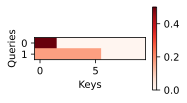

In [31]:
d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)),
    xlabel='Keys', ylabel='Queries')

## 缩放点积注意力

In [32]:
class DotProductAttention(nn.Module):
    """缩放点积注意力"""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)  # Dropout 层

    def forward(self, queries, keys, values, valid_lens=None):
        # 获取查询的特征维度 d
        d = queries.shape[-1]
        
        # 计算查询和键的点积
        # queries 的形状：(batch_size, num_queries, d)
        # keys 的形状：(batch_size, num_keys, d)
        # keys.transpose(1, 2) 的形状：(batch_size, d, num_keys)
        # scores 的形状：(batch_size, num_queries, num_keys)
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(d)
        
        # 应用掩蔽操作
        self.attention_weights = masked_softmax(scores, valid_lens)
        
        # 应用 Dropout
        attention_weights = self.dropout(self.attention_weights)
        
        # 对值进行加权求和
        # values 的形状：(batch_size, num_keys, value_dim)
        # output 的形状：(batch_size, num_queries, value_dim)
        output = torch.bmm(attention_weights, values)
        
        return output

In [33]:
queries = torch.normal(0, 1, (2, 1, 2))
attention = DotProductAttention(dropout=0.5)
attention.eval()
attention(queries, keys, values, valid_lens)

tensor([[[ 2.0000,  3.0000,  4.0000,  5.0000]],

        [[10.0000, 11.0000, 12.0000, 13.0000]]])

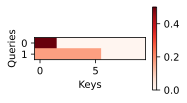

In [34]:
d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)),
xlabel='Keys', ylabel='Queries')

# Bahdanau注意力

Bahdanau注意力是一种用于序列到序列模型的注意力机制，旨在解决传统编码器-解码器模型在处理长序列时的瓶颈问题。其核心思想是通过动态计算上下文向量，使解码器在生成每个输出时能够关注输入序列的不同部分。

## 关键点：
1. **对齐分数**：Bahdanau注意力通过计算对齐分数（alignment score）来衡量编码器隐藏状态$h_i$和解码器隐藏状态$s_{t-1}$之间的相关性。对齐分数通常通过一个可学习的神经网络计算，公式为：
   $$ e_{ti} = v^T \tanh(W_h h_i + W_s s_{t-1} + b) $$
   其中，$v$、$W_h$、$W_s$和$b$是可学习参数。

2. **注意力权重**：将对齐分数通过softmax函数归一化，得到注意力权重$\alpha_{ti}$：
   $$ \alpha_{ti} = \frac{\exp(e_{ti})}{\sum_{j=1}^T \exp(e_{tj})} $$

3. **上下文向量**：使用注意力权重对编码器隐藏状态加权求和，生成上下文向量$c_t$：
   $$ c_t = \sum_{i=1}^T \alpha_{ti} h_i $$

4. **解码器输出**：将上下文向量$c_t$与解码器隐藏状态$s_{t-1}$结合，生成当前时间步的输出。

## 特点：
- **软注意力**：Bahdanau注意力是一种软注意力机制，允许模型关注输入序列的多个部分。
- **动态权重**：注意力权重随解码过程动态调整，使模型能够灵活捕捉输入序列中的重要信息。

Bahdanau注意力显著提升了序列到序列模型在机器翻译等任务中的表现，尤其是在处理长序列时。

## 模型

In [5]:
import torch
from torch import nn
from d2l import torch as d2l

## 定义注意力解码器

In [6]:
#@save
class AttentionDecoder(d2l.Decoder):
    """带有注意力机制解码器的基本接口"""
    def __init__(self, **kwargs):
        super(AttentionDecoder, self).__init__(**kwargs)
    @property
    def attention_weights(self):
        raise NotImplementedError

接下来在的Seq2SeqAttentionDecoder类中实现带有Bahdanau注意力的循环神经网络解码器。首先，初始化解码器的状态，需要下面的输入：

1. 编码器在所有时间步的最终层隐状态，将作为注意力的键和值；
2. 上一时间步的编码器全层隐状态，将作为初始化解码器的隐状态；
3.  编码器有效长度（排除在注意力池中填充词元）。


在每个解码时间步骤中，解码器上一个时间步的最终层隐状态将用作查询。因此，注意力输出和输入嵌入都
连结为循环神经网络解码器的输入。


In [7]:
class Seq2SeqAttentionDecoder(AttentionDecoder):
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers, dropout=0, **kwargs):
        super(Seq2SeqAttentionDecoder, self).__init__(**kwargs)
        # 初始化加性注意力模块
        self.attention = d2l.AdditiveAttention(num_hiddens, num_hiddens, num_hiddens, dropout)
        # 初始化词嵌入层
        self.embedding = nn.Embedding(vocab_size, embed_size)
        # 初始化GRU模块，输入维度为词嵌入维度 + 注意力上下文维度
        self.rnn = nn.GRU(embed_size + num_hiddens, num_hiddens, num_layers, dropout=dropout)
        # 初始化全连接层，将RNN输出映射到词汇表大小的维度
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        # 解码器的初始状态包括：
        # 1. 编码器的输出序列（调整维度为 (batch_size, num_steps, num_hiddens)）
        # 2. 编码器的隐藏状态
        # 3. 编码器的有效长度
        outputs, hidden_state = enc_outputs
        return (outputs.permute(1, 0, 2), hidden_state, enc_valid_lens)

    def forward(self, X, state):
        # 解码器的输入序列 X 的形状为 (num_steps, batch_size)
        # 解码器的状态 state 包括编码器的输出、隐藏状态和有效长度
        enc_outputs, hidden_state, enc_valid_lens = state

        # 将输入序列 X 通过词嵌入层，并调整维度为 (num_steps, batch_size, embed_size)
        X = self.embedding(X).permute(1, 0, 2)

        # 初始化输出列表和注意力权重列表
        outputs, self._attention_weights = [], []

        # 遍历输入序列的每个时间步
        for x in X:
            # 使用解码器的最后一个隐藏状态作为查询向量
            query = torch.unsqueeze(hidden_state[-1], dim=1)
            # 计算注意力上下文向量
            context = self.attention(query, enc_outputs, enc_outputs, enc_valid_lens)

            # 将注意力上下文向量与当前时间步的词嵌入向量拼接
            x = torch.cat((context, torch.unsqueeze(x, dim=1)), dim=-1)

            # 将拼接后的特征输入到RNN模块，更新隐藏状态并获取输出
            out, hidden_state = self.rnn(x.permute(1, 0, 2), hidden_state)

            # 将当前时间步的输出添加到输出列表中
            outputs.append(out)
            # 将当前时间步的注意力权重添加到注意力权重列表中
            self._attention_weights.append(self.attention.attention_weights)

        # 将所有时间步的输出拼接起来，通过全连接层
        outputs = self.dense(torch.cat(outputs, dim=0))

        # 返回最终的输出序列和更新后的状态
        return outputs.permute(1, 0, 2), [enc_outputs, hidden_state, enc_valid_lens]

    @property
    def attention_weights(self):
        # 返回存储的注意力权重列表
        return self._attention_weights

接下来，使用包含7个时间步的4个序列输入的小批量测试Bahdanau注意力解码器。

In [8]:
encoder = d2l.Seq2SeqEncoder(vocab_size=10, embed_size=8, num_hiddens=16,
                            num_layers=2)
encoder.eval()
decoder = Seq2SeqAttentionDecoder(vocab_size=10, embed_size=8, num_hiddens=16,
                                num_layers=2)

decoder.eval()
X = torch.zeros((4, 7), dtype=torch.long) # (batch_size,num_steps)
state = decoder.init_state(encoder(X), None)
output, state = decoder(X, state)
output.shape, len(state), state[0].shape, len(state[1]), state[1][0].shape

(torch.Size([4, 7, 10]), 3, torch.Size([4, 7, 16]), 2, torch.Size([4, 16]))

## 训练

loss 0.021, 4097.1 tokens/sec on cuda:0


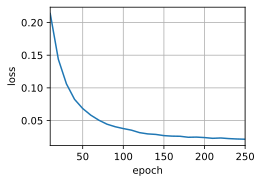

In [9]:
embed_size, num_hiddens, num_layers, dropout = 32, 32, 2, 0.1
batch_size, num_steps = 64, 10
lr, num_epochs, device = 0.005, 250, d2l.try_gpu()

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)
encoder = d2l.Seq2SeqEncoder(
    len(src_vocab), embed_size, num_hiddens, num_layers, dropout)
decoder = Seq2SeqAttentionDecoder(
    len(tgt_vocab), embed_size, num_hiddens, num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

In [11]:
# 英语句子列表
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
# 对应的法语翻译句子列表
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']

# 遍历英语句子和对应的法语句子
for eng, fra in zip(engs, fras):
    # 使用Seq2Seq模型进行翻译
    # net: 训练好的Seq2Seq模型
    # eng: 当前要翻译的英语句子
    # src_vocab: 源语言（英语）的词汇表
    # tgt_vocab: 目标语言（法语）的词汇表
    # num_steps: 最大翻译步数
    # device: 运行模型的设备
    # True: 可能用于指定是否打印额外信息或启用某种模式
    translation, dec_attention_weight_seq = d2l.predict_seq2seq(
        net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    
    # 打印翻译结果和BLEU分数
    # d2l.bleu: 计算BLEU分数的函数
    # translation: 模型生成的翻译结果
    # fra: 真实的法语翻译句子
    # k=2: 指定在计算BLEU分数时考虑的n-gram的最大长度
    print(f'{eng} => {translation}, ',
          f'bleu {d2l.bleu(translation, fra, k=2):.3f}')

go . => va !,  bleu 1.000
i lost . => j'ai perdu .,  bleu 1.000
he's calm . => il est riche .,  bleu 0.658
i'm home . => je suis chez moi .,  bleu 1.000


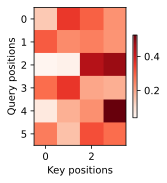

In [12]:
attention_weights = torch.cat([step[0][0][0] for step in dec_attention_weight_seq], 0).reshape((
    1, 1, -1, num_steps))
# 加上一个包含序列结束词元
d2l.show_heatmaps(
attention_weights[:, :, :, :len(engs[-1].split()) + 1].cpu(),
xlabel='Key positions', ylabel='Query positions')

# 多头注意力

## 1. **基本概念**
### 1.1 单头注意力
在单头注意力中，输入序列通过线性变换生成 **查询（Query）**、**键（Key）** 和 **值（Value）** 向量，然后计算注意力权重并加权求和得到输出。公式如下：

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

其中：
- $Q$ 是查询矩阵，形状为 $(n, d_k)$。
- $K$ 是键矩阵，形状为 $(m, d_k)$。
- $V$ 是值矩阵，形状为 $(m, d_v)$。
- $d_k$ 是查询和键的维度。
- $d_v$ 是值的维度。

### 1.2 多头注意力
多头注意力通过将输入序列投影到多个子空间，并行计算多个注意力头，然后将结果拼接并线性变换。公式如下：

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \dots, \text{head}_h)W^O
$$

其中：
- 每个注意力头 $\text{head}_i$ 的计算公式为：
  $$
  \text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
  $$
- $W_i^Q$、$W_i^K$、$W_i^V$ 是第 $i$ 个注意力头的投影矩阵。
- $W^O$ 是输出投影矩阵。
- $h$ 是注意力头的数量。

---

## 2. **多头注意力的优势**
1. **捕捉多样化特征**：
   - 每个注意力头可以关注输入序列的不同部分，从而捕捉到多样化的特征。
   - 例如，一个头可能关注局部依赖，另一个头可能关注全局依赖。

2. **并行计算**：
   - 多个注意力头可以并行计算，充分利用硬件资源（如 GPU）。

3. **增强模型表达能力**：
   - 通过多个子空间的投影，模型能够学习到更丰富的表示。

---

## 3. **多头注意力的计算流程**
1. **线性投影**：
   - 将输入序列分别投影到 $h$ 个查询、键和值子空间。
   - 每个子空间的维度通常为 $d_k = d_v = d_{\text{model}} / h$，其中 $d_{\text{model}}$ 是输入维度。

2. **计算注意力**：
   - 在每个子空间中，使用单头注意力机制计算注意力权重和加权值。

3. **拼接结果**：
   - 将所有注意力头的输出拼接起来，形状为 $(n, h \cdot d_v)$。

4. **线性变换**：
   - 将拼接后的结果通过线性变换 $W^O$，得到最终输出，形状为 $(n, d_{\text{model}})$。

---

## 4. **多头注意力的数学细节**
### 4.1 投影矩阵
- 查询投影矩阵：$W_i^Q \in \mathbb{R}^{d_{\text{model}} \times d_k}$
- 键投影矩阵：$W_i^K \in \mathbb{R}^{d_{\text{model}} \times d_k}$
- 值投影矩阵：$W_i^V \in \mathbb{R}^{d_{\text{model}} \times d_v}$
- 输出投影矩阵：$W^O \in \mathbb{R}^{h \cdot d_v \times d_{\text{model}}}$

### 4.2 注意力权重
- 每个注意力头的权重计算：
  $$
  \text{Attention}(QW_i^Q, KW_i^K, VW_i^V) = \text{softmax}\left(\frac{(QW_i^Q)(KW_i^K)^T}{\sqrt{d_k}}\right)(VW_i^V)
  $$

### 4.3 输出
- 最终输出：
  $$
  \text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \dots, \text{head}_h)W^O
  $$

---

## 5. **多头注意力的应用**
1. **Transformer 模型**：
   - 多头注意力是 Transformer 编码器和解码器的核心组件。
   - 在编码器中，用于捕捉输入序列的内部依赖。
   - 在解码器中，用于捕捉输入序列和输出序列之间的依赖。

2. **其他领域**：
   - 计算机视觉（如 Vision Transformer）。
   - 语音处理（如 Speech Transformer）。

## 模型

In [13]:
import math
import torch
from torch import nn
from d2l import torch as d2l

## 实现

In [17]:
class MultiHeadAttention(nn.Module):
    """多头注意力"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 num_heads, dropout, bias=False, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads  # 头的数量
        self.attention = d2l.DotProductAttention(dropout)  # 点积注意力机制
        self.W_q = nn.Linear(query_size, num_hiddens, bias=bias)  # 查询的线性变换
        self.W_k = nn.Linear(key_size, num_hiddens, bias=bias)    # 键的线性变换
        self.W_v = nn.Linear(value_size, num_hiddens, bias=bias)  # 值的线性变换
        self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=bias) # 输出的线性变换

    def forward(self, queries, keys, values, valid_lens):
        # queries，keys，values的形状:
        # (batch_size，查询或者“键－值”对的个数，num_hiddens)
        # valid_lens　的形状:
        # (batch_size，)或(batch_size，查询的个数)
        
        # 对queries，keys，values进行线性变换
        queries = transpose_qkv(self.W_q(queries), self.num_heads)
        keys = transpose_qkv(self.W_k(keys), self.num_heads)
        values = transpose_qkv(self.W_v(values), self.num_heads)
        
        # 如果提供了有效长度，将其在第0维复制num_heads次
        if valid_lens is not None:
            valid_lens = torch.repeat_interleave(
                valid_lens, repeats=self.num_heads, dim=0)
        
        # 对每个头执行点积注意力机制
        # output的形状:(batch_size*num_heads，查询的个数，
        # num_hiddens/num_heads)
        output = self.attention(queries, keys, values, valid_lens)
        
        # 将多头的输出重新组合成一个张量
        # output_concat的形状:(batch_size，查询的个数，num_hiddens)
        output_concat = transpose_output(output, self.num_heads)
        
        # 对合并后的输出进行线性变换，得到最终的多头注意力输出，不是最终输出，这里最后的输出是(batch_size, num_queries, num_hidds)
        return self.W_o(output_concat)

为了能够使多个头并行计算，上面的MultiHeadAttention类将使用下面定义的两个转置函数，分别是transpose_qkv函数和transpose_output函数。具体transpose_output函数反转了transpose_qkv函数的操作。

transpose_qkv 函数通常不是 PyTorch 框架自带的，而是根据具体需求自己定义的。在多头注意力机制中，transpose_qkv 函数的作用是将输入张量（如查询 queries、键 keys、值 values）从形状 (batch_size, num_queries/keys/values, num_hiddens) 转换为 (batch_size * num_heads, num_queries/keys/values, num_hiddens / num_heads)，以便进行多头注意力计算。

In [18]:
#@save
def transpose_qkv(X, num_heads):
    """
    为了多注意力头的并行计算而变换形状
    输入X的形状: (batch_size, 查询或者“键－值”对的个数, num_hiddens)
    输出X的形状: (batch_size * num_heads, 查询或者“键－值”对的个数, num_hiddens / num_heads)
    """
    # 输入X的形状: (batch_size, num_queries/keys/values, num_hiddens)
    # 输出X的形状: (batch_size, num_queries/keys/values, num_heads, num_hiddens / num_heads)
    X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)
    
    # 输出X的形状: (batch_size, num_heads, num_queries/keys/values, num_hiddens / num_heads)
    X = X.permute(0, 2, 1, 3)
    
    # 最终输出的形状: (batch_size * num_heads, num_queries/keys/values, num_hiddens / num_heads)
    return X.reshape(-1, X.shape[2], X.shape[3])

#@save
def transpose_output(X, num_heads):
    """
    逆转transpose_qkv函数的操作
    输入X的形状: (batch_size * num_heads, num_queries/keys/values, num_hiddens / num_heads)
    输出X的形状: (batch_size, num_queries/keys/values, num_hiddens)
    """
    # 输入X的形状: (batch_size * num_heads, num_queries/keys/values, num_hiddens / num_heads)
    # 输出X的形状: (-1, num_heads, num_queries/keys/values, num_hiddens / num_heads)
    X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])
    
    # 输出X的形状: (batch_size, num_queries/keys/values, num_heads, num_hiddens / num_heads)
    X = X.permute(0, 2, 1, 3)
    
    # 最终输出的形状: (batch_size, num_queries/keys/values, num_hiddens)
    return X.reshape(X.shape[0], X.shape[1], -1)

下面使用键和值相同的小例子来测试我们编写的MultiHeadAttention类。多头注意力输出的形状是（batch_size，num_queries，num_hiddens）。

In [20]:
num_hiddens, num_heads = 100, 5
attention = MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens,
                                num_hiddens, num_heads, 0.5)
attention.eval()

MultiHeadAttention(
  (attention): DotProductAttention(
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (W_q): Linear(in_features=100, out_features=100, bias=False)
  (W_k): Linear(in_features=100, out_features=100, bias=False)
  (W_v): Linear(in_features=100, out_features=100, bias=False)
  (W_o): Linear(in_features=100, out_features=100, bias=False)
)

In [21]:
batch_size, num_queries = 2, 4
num_kvpairs, valid_lens = 6, torch.tensor([3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))
Y = torch.ones((batch_size, num_kvpairs, num_hiddens))
attention(X, Y, Y, valid_lens).shape

torch.Size([2, 4, 100])

# 自注意力与位置编码

自注意力（Self-Attention）和位置编码（Positional Encoding）是 Transformer 模型中的两个核心组件。自注意力用于捕捉序列中不同位置之间的依赖关系，而位置编码则用于为模型提供序列中元素的位置信息。

---

## 1. **自注意力（Self-Attention）**

### 1.1 基本概念
自注意力是一种机制，通过计算序列中每个元素与其他元素之间的关系，来捕捉全局依赖。它的核心思想是：
- 对输入序列中的每个元素，计算其与序列中所有元素的 **注意力权重**。
- 根据注意力权重，对序列中的元素进行加权求和，得到新的表示。

### 1.2 计算过程
1. **生成查询（Query）、键（Key）和值（Value）**：
   - 输入序列 $X$ 通过线性变换生成查询矩阵 $Q$、键矩阵 $K$ 和值矩阵 $V$：
     $$
     Q = XW_Q, \quad K = XW_K, \quad V = XW_V
     $$
   - 其中 $W_Q$、$W_K$、$W_V$ 是可学习的权重矩阵。

2. **计算注意力权重**：
   - 通过点积计算查询和键之间的相似度，然后通过 softmax 归一化：
     $$
     \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
     $$
   - 其中 $d_k$ 是查询和键的维度，$\sqrt{d_k}$ 用于缩放点积结果，防止梯度消失。

3. **加权求和**：
   - 使用注意力权重对值矩阵 $V$ 进行加权求和，得到输出表示。

### 1.3 多头自注意力
- 通过并行计算多个注意力头，捕捉多样化的特征：
  $$
  \text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \dots, \text{head}_h)W_O
  $$
- 每个注意力头的计算方式与单头自注意力相同。

---

## 2. **位置编码（Positional Encoding）**

### 2.1 基本概念
- Transformer 模型本身没有显式的序列顺序信息，因此需要通过位置编码为输入序列添加位置信息。
- 位置编码是一种固定的或可学习的表示，用于区分序列中不同位置的元素。

### 2.2 正弦位置编码
- 在原始 Transformer 中，使用正弦和余弦函数生成位置编码：
  $$
  PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
  $$
  $$
  PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
  $$
  - 其中 $pos$ 是位置索引，$i$ 是维度索引，$d_{\text{model}}$ 是模型维度。
- 这种编码方式能够捕捉相对位置信息，并且可以扩展到比训练时更长的序列。

### 2.3 可学习的位置编码
- 位置编码也可以设计为可学习的参数，通过训练得到。

### 2.4 位置编码的作用
- 为模型提供序列中元素的位置信息。
- 使模型能够区分不同位置的元素，从而捕捉序列的顺序依赖。

---

## 3. **自注意力与位置编码的结合**
1. **输入表示**：
   - 输入序列 $X$ 的每个元素通过词嵌入转换为向量表示。
   - 将位置编码添加到词嵌入中，得到最终的输入表示：
     $$
     X_{\text{final}} = X_{\text{embedding}} + X_{\text{positional}}
     $$

2. **自注意力计算**：
   - 使用带有位置信息的输入表示计算自注意力。
   - 自注意力机制能够同时捕捉序列中元素的语义信息和位置信息。

---

## 4. **总结**
- **自注意力**：
  - 用于捕捉序列中元素之间的全局依赖。
  - 通过查询、键和值矩阵计算注意力权重，并对值进行加权求和。
  - 多头自注意力通过并行计算多个注意力头，增强模型的表达能力。

- **位置编码**：
  - 用于为模型提供序列中元素的位置信息。
  - 正弦位置编码是一种常用的固定编码方式，能够捕捉相对位置信息。
  - 位置编码与词嵌入相加，作为自注意力机制的输入。


In [22]:
import math
import torch
from torch import nn
from d2l import torch as d2l

下面的代码片段是基于多头注意力对一个张量完成自注意力的计算，张量的形状为（批量大小，时间步的数目或词元序列的长度，d）。输出与输入的张量形状相同。

In [23]:
num_hiddens, num_heads = 100, 5
attention = d2l.MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens,
                                    num_hiddens, num_heads, 0.5)
attention.eval()

MultiHeadAttention(
  (attention): DotProductAttention(
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (W_q): Linear(in_features=100, out_features=100, bias=False)
  (W_k): Linear(in_features=100, out_features=100, bias=False)
  (W_v): Linear(in_features=100, out_features=100, bias=False)
  (W_o): Linear(in_features=100, out_features=100, bias=False)
)

In [24]:
batch_size, num_queries, valid_lens = 2, 4, torch.tensor([3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))
attention(X, X, X, valid_lens).shape

torch.Size([2, 4, 100])

## 比较卷积神经网络、循环神经网络和自注意力
卷积神经网络（CNN）、循环神经网络（RNN）和自注意力机制（Self-Attention）是深度学习中常用的三种模型架构，各自适用于不同的任务和数据类型。以下是它们的比较：

### 1. **卷积神经网络（CNN）**
   - **特点**:
     - **局部感受野**: CNN通过卷积核在输入数据上滑动，提取局部特征。
     - **权重共享**: 卷积核在整个输入上共享参数，减少了参数量。
     - **层次化特征提取**: 通过多层卷积和池化操作，CNN能够提取从低级到高级的特征。
   - **适用场景**:
     - **图像处理**: 如图像分类、目标检测、图像分割等。
     - **其他网格数据**: 如时间序列数据、文本数据（通过1D卷积）。
   - **优点**:
     - 参数共享和局部连接使得CNN在处理高维数据时非常高效。
     - 能够自动提取层次化的特征。
   - **缺点**:
     - 对于长距离依赖关系（如文本中的上下文关系）处理能力较弱。

### 2. **循环神经网络（RNN）**
   - **特点**:
     - **时间步处理**: RNN通过时间步逐步处理序列数据，每个时间步的输出依赖于当前输入和前一时刻的隐藏状态。
     - **记忆能力**: RNN能够捕捉序列中的时间依赖关系。
   - **适用场景**:
     - **序列数据处理**: 如自然语言处理（NLP）、时间序列预测、语音识别等。
   - **优点**:
     - 能够处理变长序列数据。
     - 能够捕捉序列中的时间依赖关系。
   - **缺点**:
     - 训练过程中容易出现梯度消失或梯度爆炸问题。
     - 对于长序列，RNN难以捕捉长距离依赖关系。

### 3. **自注意力机制（Self-Attention）**
   - **特点**:
     - **全局依赖**: 自注意力机制通过计算输入序列中每个元素与其他元素的关系，捕捉全局依赖关系。
     - **并行计算**: 与RNN不同，自注意力机制可以并行计算所有位置的关系，提高了计算效率。
   - **适用场景**:
     - **自然语言处理**: 如机器翻译、文本生成、文本分类等。
     - **其他序列数据**: 如时间序列分析、图像处理（如Vision Transformer）。
   - **优点**:
     - 能够捕捉长距离依赖关系。
     - 并行计算能力强，训练速度快。
   - **缺点**:
     - 计算复杂度较高，尤其是对于长序列数据。
     - 需要大量数据来训练，容易过拟合。

### 4. **总结比较**
   - **CNN**: 适合处理具有局部结构的网格数据（如图像），能够高效提取层次化特征，但在处理长距离依赖关系时表现较差。
   - **RNN**: 适合处理序列数据，能够捕捉时间依赖关系，但训练速度较慢，且难以处理长序列中的长距离依赖。
   - **自注意力机制**: 适合处理需要捕捉全局依赖关系的序列数据，能够并行计算，训练速度快，但计算复杂度较高，且需要大量数据。

### 5. **结合使用**
   - **CNN + RNN**: 在一些任务中，CNN和RNN可以结合使用。例如，在视频处理中，CNN用于提取每一帧的空间特征，RNN用于捕捉帧间的时间依赖关系。
   - **Transformer（基于自注意力）**: Transformer模型完全基于自注意力机制，摒弃了RNN和CNN的结构，在NLP任务中取得了显著的成功，并逐渐扩展到其他领域。

每种模型都有其独特的优势和适用场景，选择哪种模型取决于具体的任务和数据类型。

In [25]:
class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, num_hiddens))
        # 计算位置编码
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(10000, torch.arange(
            0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
        # 偶数维度设置为正弦值
        self.P[:, :, 0::2] = torch.sin(X)
        # 奇数维度设置为余弦值
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        # 截取与输入序列长度相同的位置编码
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        # 应用Dropout
        return self.dropout(X)

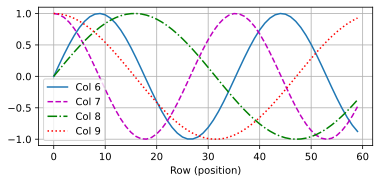

In [26]:
encoding_dim, num_steps = 32, 60
pos_encoding = PositionalEncoding(encoding_dim, 0)
pos_encoding.eval()
X = pos_encoding(torch.zeros((1, num_steps, encoding_dim)))
P = pos_encoding.P[:, :X.shape[1], :]
d2l.plot(torch.arange(num_steps), P[0, :, 6:10].T, xlabel='Row (position)',
        figsize=(6, 2.5), legend=["Col %d" % d for d in torch.arange(6, 10)])

In [27]:
for i in range(8):
    print(f'{i}的二进制是：{i:>03b}')

0的二进制是：000
1的二进制是：001
2的二进制是：010
3的二进制是：011
4的二进制是：100
5的二进制是：101
6的二进制是：110
7的二进制是：111


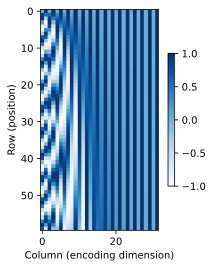

In [28]:
P = P[0, :, :].unsqueeze(0).unsqueeze(0)
d2l.show_heatmaps(P, xlabel='Column (encoding dimension)',
                    ylabel='Row (position)', figsize=(3.5, 4), cmap='Blues')